In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking the column names

In [4]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Checking the shape of data

In [5]:
data.shape

(1599, 12)

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Checking datatype of each column in the dataset

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Printing the complete information of the data

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Checking for the null values

In [10]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Plotting the heatmap

<AxesSubplot:>

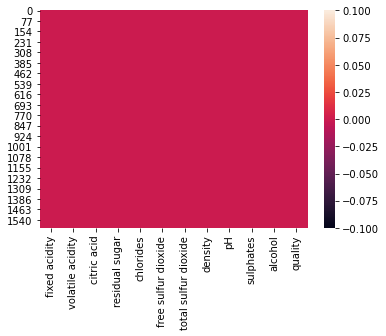

In [12]:
sns.heatmap(data.isnull())

Describing the dataset

In [13]:

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking for the skewness of the dataset

In [15]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Ploting the graph of output with two or more columns

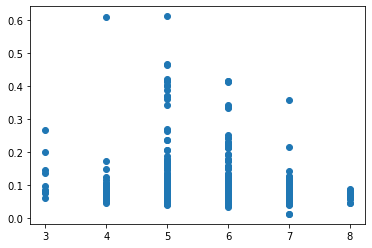

In [16]:
plt.scatter(data['quality'],data['chlorides'])
plt.show()

<AxesSubplot:>

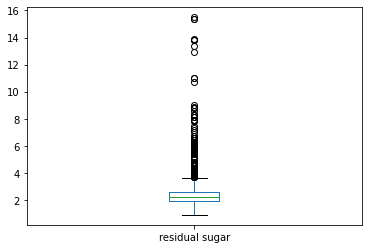

In [18]:
data['residual sugar'].plot.box()

<AxesSubplot:ylabel='Frequency'>

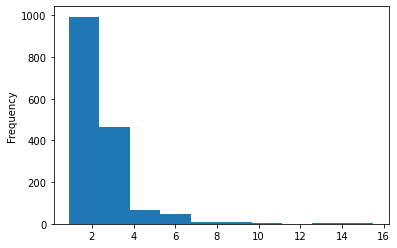

In [19]:
data['residual sugar'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

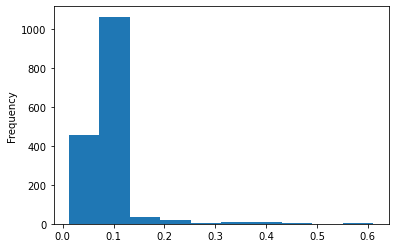

In [20]:

data['chlorides'].plot.hist()

<AxesSubplot:>

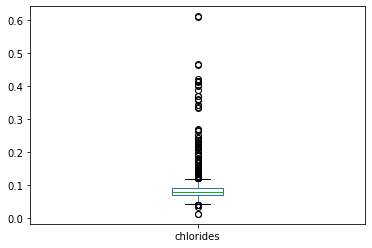

In [21]:
data['chlorides'].plot.box()

Checking and removing the outliers

In [22]:
# removing outliers

from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [23]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [24]:

data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [25]:
from scipy.stats import boxcox
data['residual sugar']=boxcox(data['residual sugar'],0)

<AxesSubplot:ylabel='Frequency'>

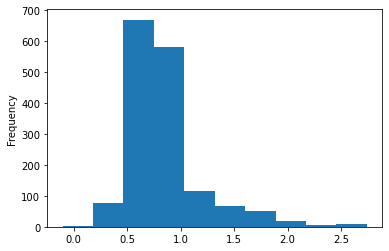

In [26]:
data['residual sugar'].plot.hist()

In [27]:
data['chlorides']=boxcox(data['chlorides'],0)

<AxesSubplot:ylabel='Frequency'>

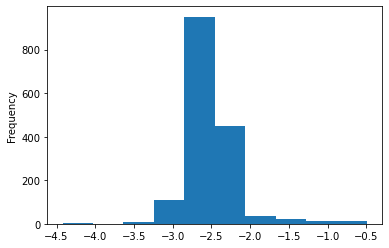

In [28]:
data['chlorides'].plot.hist()

Plotting the pairplot graph

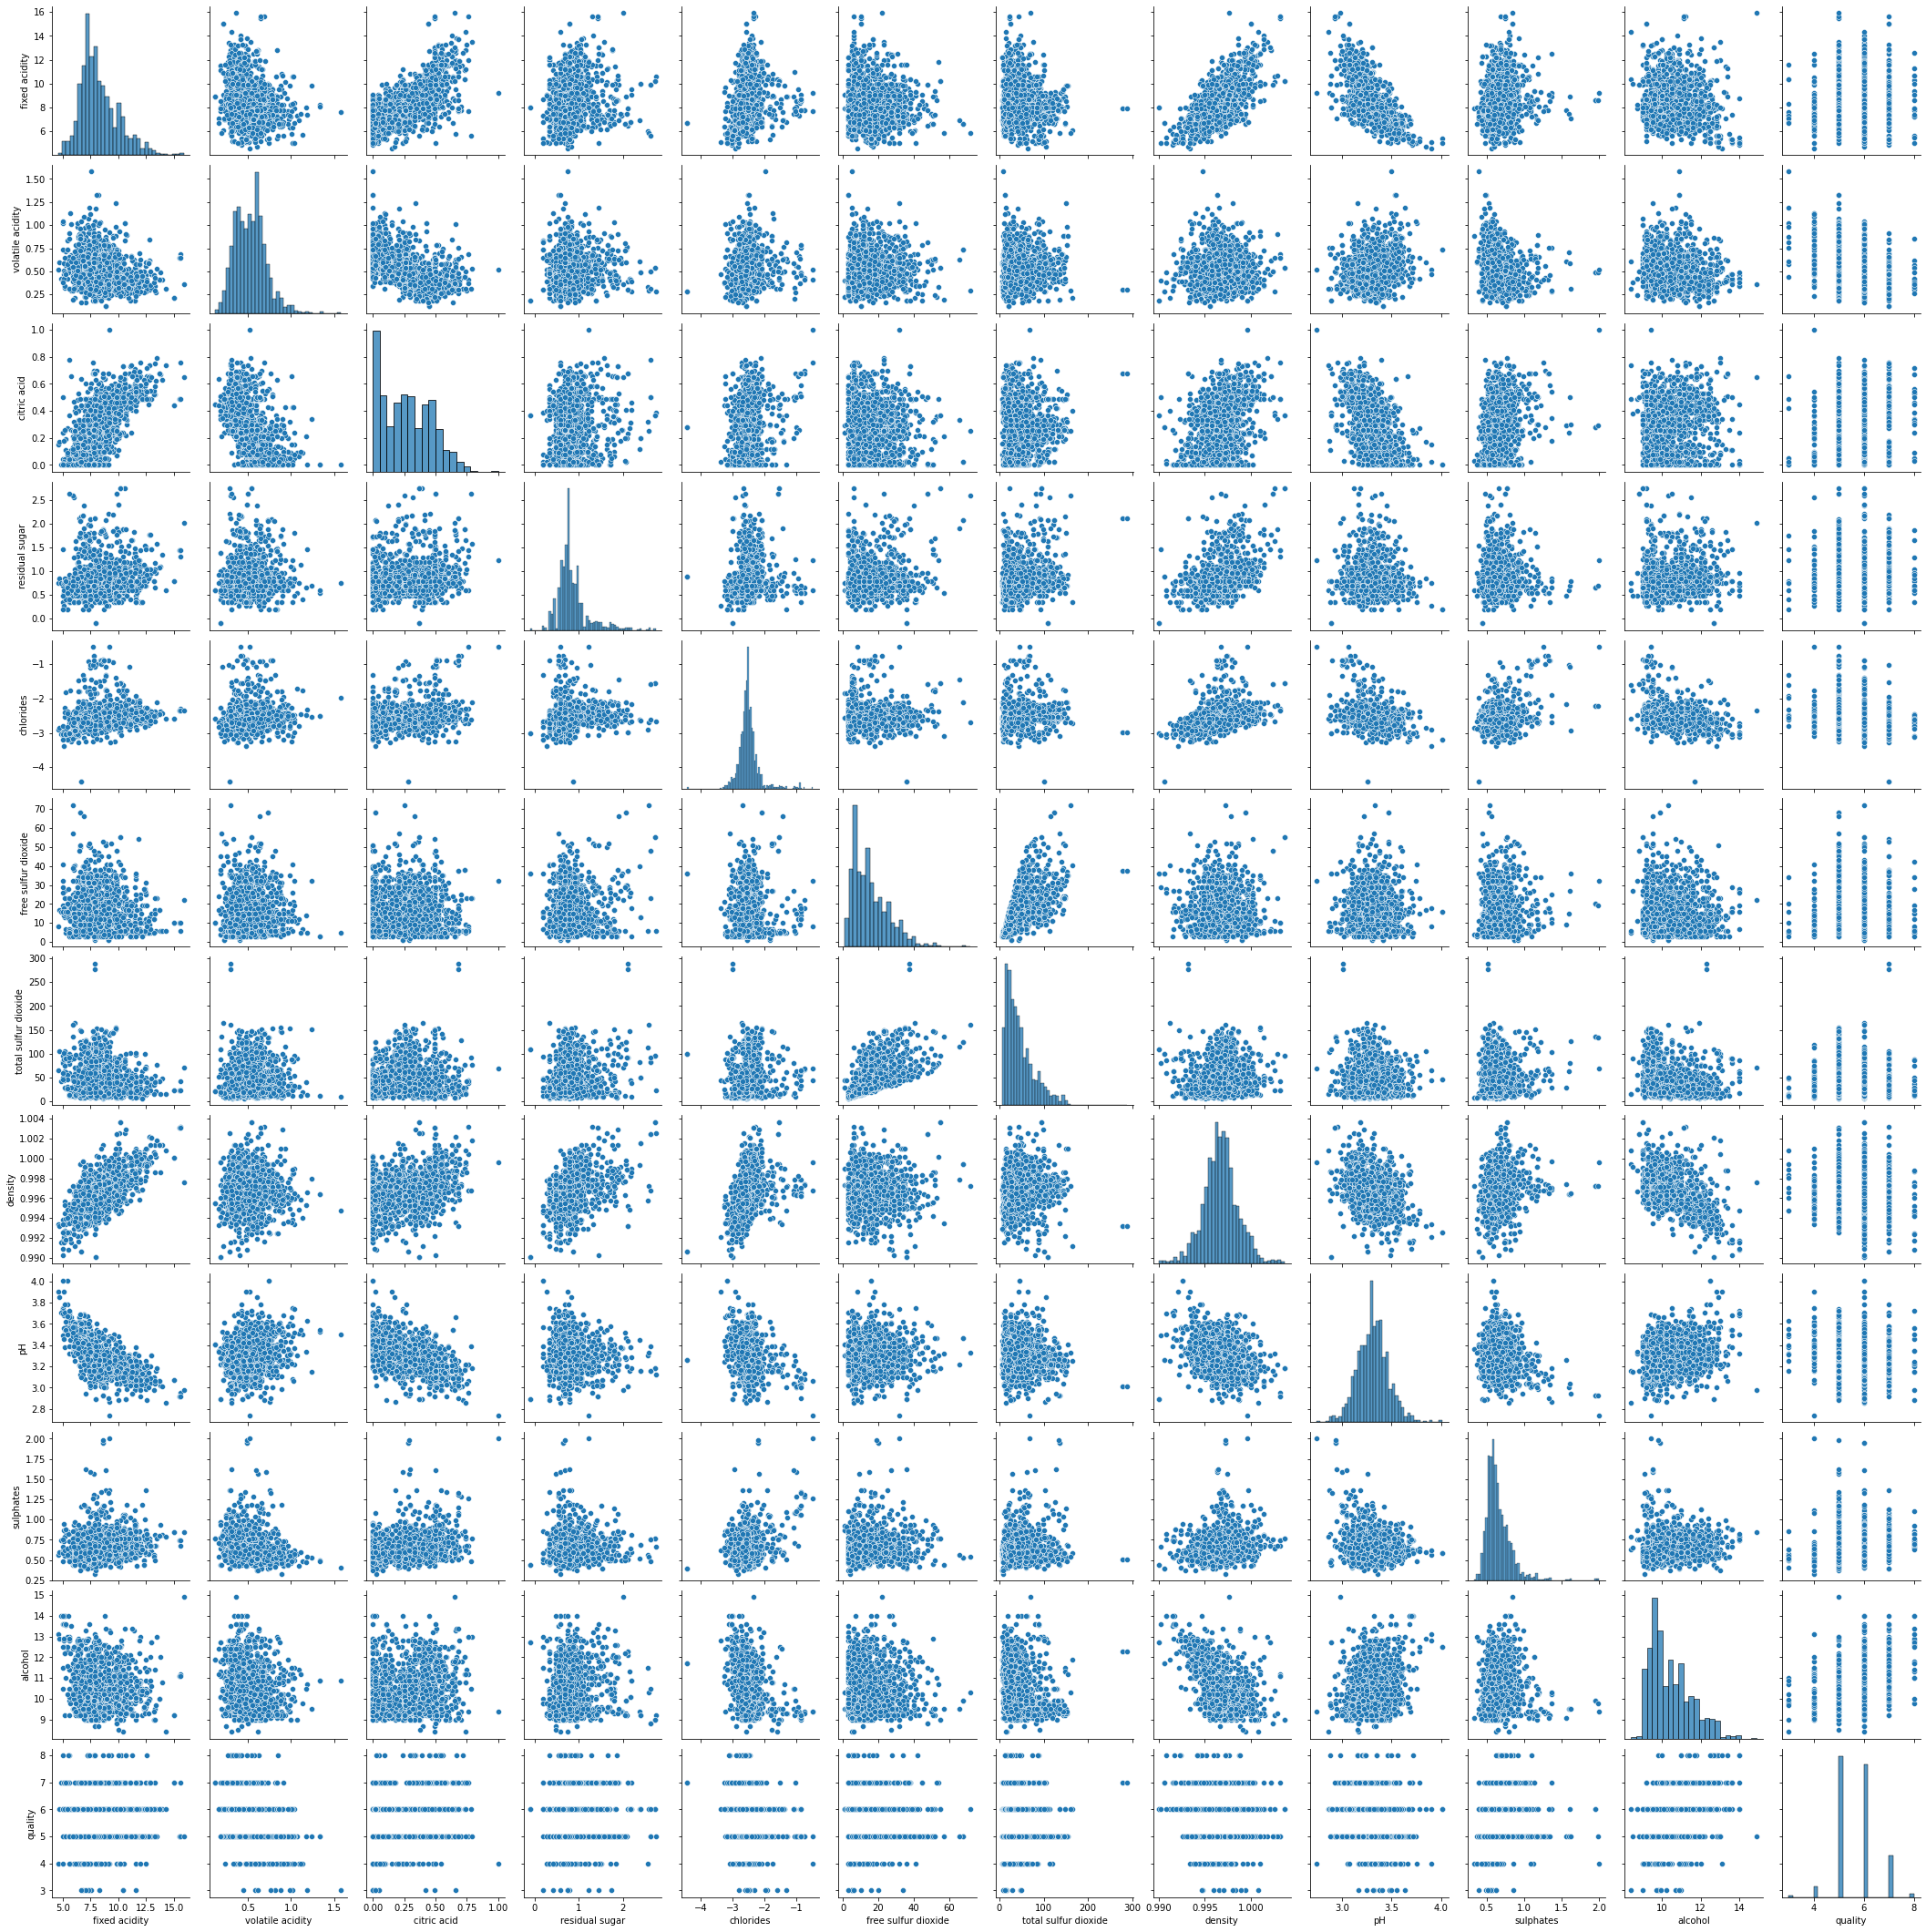

In [29]:
sns.pairplot(data)

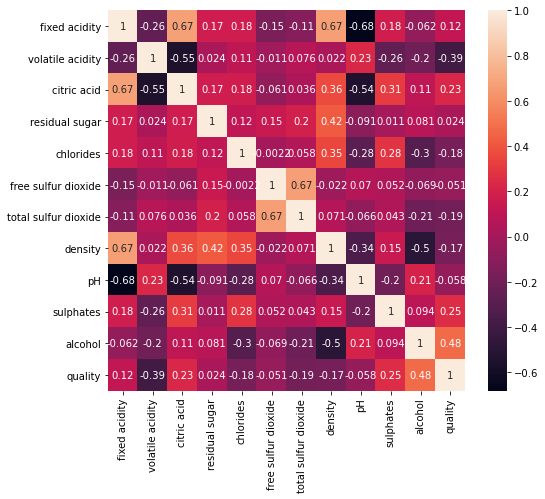

In [30]:
data_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(data_hmap,annot=True)
plt.show()

Defining the data with value > 7 as good and other's as bad

In [32]:

data['goodquality']=[1 if x>=7 else 0 for x in data['quality']]

X = data.drop(['quality','goodquality'], axis = 1)
y = data['goodquality']

In [33]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64


Normalizing the feature variables

In [34]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

Splitting the data into Train Test split

In [35]:
# Splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

Printing the values of train and test data

In [37]:
X_train

array([[ 0.16107692, -0.21128341,  0.09769112, ..., -2.46933839,
         7.8006504 , -0.58477711],
       [-0.18364134, -1.94309115,  0.50849482, ..., -2.72850951,
        -1.28736344,  2.13737311],
       [-0.87307788,  0.79428237, -1.39147228, ...,  0.57592232,
         0.48302886, -0.67864436],
       ...,
       [-0.24109439,  0.23563472,  0.20039205, ..., -0.13679827,
         0.18796348, -0.86637886],
       [ 2.68901088, -0.32301294,  1.12470036, ..., -0.07200549,
         0.1289504 ,  2.13737311],
       [ 0.85051346,  2.52609011,  0.25174251, ..., -0.39596939,
        -1.05131114, -0.96024611]])

In [38]:
X_test

array([[ 1.4250439 , -0.32301294,  0.81659759, ..., -0.91431164,
         0.60105502,  0.35389538],
       [-0.1261883 ,  1.63225386, -1.39147228, ...,  0.3167512 ,
        -0.75624575, -0.77251161],
       [ 0.44834214, -1.32857872,  0.30309297, ..., -0.33117661,
         1.07315963,  1.19870062],
       ...,
       [-0.29854743,  0.12390519,  0.4057939 , ..., -0.39596939,
        -0.57920652, -1.1479806 ],
       [-0.87307788,  0.68255284, -1.28877135, ...,  0.25195842,
        -0.22512806, -0.02157362],
       [-0.18364134, -0.546472  ,  0.45714436, ...,  0.18716564,
        -1.16933729, -0.96024611]])

In [39]:

y_train

92      0
1017    0
1447    0
838     1
40      0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: goodquality, Length: 1119, dtype: int64

In [40]:
y_test

1109    0
1032    0
1002    1
487     0
979     0
       ..
801     0
61      0
431     0
1210    0
713     0
Name: goodquality, Length: 480, dtype: int64

Fitting the 1st model with DTC

In [41]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.49      0.68      0.57        50

    accuracy                           0.89       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.91      0.89      0.90       480



Calculating the errors

In [43]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred1)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.10833333333333334
root mean squared error is :  0.32914029430219166


Identifying the roc and auc_roc curve

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score

fp1, tp1 , thresh1 = roc_curve(y_test,y_pred1)

In [47]:
auc = roc_auc_score(y_test, y_pred1)
print('AUC: %.3f' % auc)

AUC: 0.798


In [48]:
print(confusion_matrix(y_test,y_pred1))

[[394  36]
 [ 16  34]]


Fitting the 2nd model with RFC

In [49]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



Calculating the errors

In [50]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred2)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.07708333333333334
root mean squared error is :  0.2776388541492947


Identifying the roc and auc_roc curve

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score

fp1, tp1 , thresh1 = roc_curve(y_test,y_pred2)

In [52]:
auc = roc_auc_score(y_test, y_pred2)
print('AUC: %.3f' % auc)

AUC: 0.771


In [53]:
print(confusion_matrix(y_test,y_pred2))

[[414  16]
 [ 21  29]]


Fitting the 3rd model with AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       430
           1       0.47      0.48      0.48        50

    accuracy                           0.89       480
   macro avg       0.70      0.71      0.71       480
weighted avg       0.89      0.89      0.89       480




Calculating the errors

In [56]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred3)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.11041666666666666
root mean squared error is :  0.3322900339562814


Identifying the roc and auc_roc curve

In [58]:

from sklearn.metrics import roc_curve,roc_auc_score

fp1, tp1 , thresh1 = roc_curve(y_test,y_pred3)

In [59]:
auc = roc_auc_score(y_test, y_pred3)
print('AUC: %.3f' % auc)

AUC: 0.709


In [60]:
print(confusion_matrix(y_test,y_pred3))

[[403  27]
 [ 26  24]]


Fitting the 4th model with GBC

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       430
           1       0.54      0.56      0.55        50

    accuracy                           0.90       480
   macro avg       0.74      0.75      0.75       480
weighted avg       0.91      0.90      0.90       480



Calculating the errors

In [63]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred4)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.09583333333333334
root mean squared error is :  0.30956959368344517


Identifying the roc and auc_roc curve

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score

fp1, tp1 , thresh1 = roc_curve(y_test,y_pred4)

In [65]:
auc = roc_auc_score(y_test, y_pred4)
print('AUC: %.3f' % auc)

AUC: 0.752


In [66]:
print(confusion_matrix(y_test,y_pred4))

[[406  24]
 [ 22  28]]


Saving the model

In [68]:
import pickle

In [69]:
with open('model1_pkl','wb') as files:
    pickle.dump(model1, files)